# 0.0 IMPORTS

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display  import HTML
from IPython.display       import Image

## 0.1 Helper Function

In [67]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [68]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [119]:
aep = pd.read_csv( 'data/AEP_hourly.csv', low_memory=False )
comed = pd.read_csv( 'data/COMED_hourly.csv', low_memory=False )
dayton = pd.read_csv( 'data/DAYTON_hourly.csv', low_memory=False )
deok = pd.read_csv( 'data/DEOK_hourly.csv', low_memory=False )
dom = pd.read_csv( 'data/DOM_hourly.csv', low_memory=False )
duq = pd.read_csv( 'data/DUQ_hourly.csv', low_memory=False )
ekpc = pd.read_csv( 'data/EKPC_hourly.csv', low_memory=False )
fe = pd.read_csv( 'data/FE_hourly.csv', low_memory=False )
ni = pd.read_csv( 'data/NI_hourly.csv', low_memory=False )
pjm = pd.read_csv( 'data/PJM_Load_hourly.csv', low_memory=False )
pjme = pd.read_csv( 'data/PJME_hourly.csv', low_memory=False )
pjmw = pd.read_csv( 'data/PJMW_hourly.csv', low_memory=False )

In [120]:
# I will combine all the datasets into one. For this I will create a column in each of the datasets that will identify your respective electric company.

aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'

In [121]:
# the column in each dataset that shows the Megawatt Energy Consumption, I will rename it with the same name in all.

aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

In [124]:
# Concatenate all the datasets
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw] )
df_raw.sample(5) # check

,Datetime,mw_energy_consumption,electric_company
77604,2013-05-25 09:00:00,12329.0,AEP
140369,2018-07-28 19:00:00,42174.0,PJME
120607,2018-01-28 05:00:00,1635.0,DAYTON
27429,2014-06-16 02:00:00,6428.0,FE
22043,2015-01-26 13:00:00,2016.0,EKPC


In [125]:
df_raw.shape

(1090167, 3)

# 1.0 STEP 01 - DESCRIPTION OF DATA

In [126]:
# At the beginning of each step I will make a copy of the dataset to make it easier to reload the data in case there is a problem with the project.
df1 = df_raw.copy()

## 1.1 Rename Columns

In [127]:
# Although I already renamed some columns when I was preparing the datasets to concatenate them, I will check if there are any more columns that are not in the format I want them to be.
df1.columns

Index(['Datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

In [128]:
# Only the column "Datetime" don't have the format that I want.
cols_old = ['Datetime', 'mw_energy_consumption', 'electric_company']

# If the dataset had too many columns to change I would use the "snakecase" technique through the "inflection" function. Since this dataset has only one column to change the name, I will do this process manually.
cols_new = ['datetime', 'mw_energy_consumption', 'electric_company']

# rename
df1.columns = cols_new

In [129]:
df1.columns

Index(['datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

## 1.2 Data Dimensions

In [130]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )
# Evaluate the possibilite do use this project in your computer

Number of Rows: 1090167
Number of Cols: 3


## 1.3 Data Types

In [131]:
df1.dtypes
# Observe datetime. It has a different data type.

datetime                  object
mw_energy_consumption    float64
electric_company          object
dtype: object

In [132]:
# function "datetime" transforma the columns "datetime" from object (string) to datetime.
df1['datetime'] = pd.to_datetime( df1['datetime'] )

In [133]:
df1.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
dtype: object

## 1.4 Check NA

In [134]:
df1.isna().sum()

datetime                 0
mw_energy_consumption    0
electric_company         0
dtype: int64

## 1.5 Fillout NA

In [135]:
# We don't have NA value to fillout... :)

## 1.6 Change Types

In [136]:
# We already did the change types.

## 1.7 Descriptive Statistical

In [137]:
# divide into numerical and categorical columns, as they will be treated with different techniques.
num_attributes = df1.select_dtypes( include=['float64'] )
cat_attributes = df1.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

In [139]:
num_attributes.sample()

,mw_energy_consumption
4028,39569.0


In [140]:
cat_attributes.sample()

,electric_company
54163,FE


### 1.7.1 Numerical Attibutes

In [141]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [142]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,mw_energy_consumption,0.0,62009.0,62009.0,11209.58865,8217.0,10534.394704,1.356423,1.198281


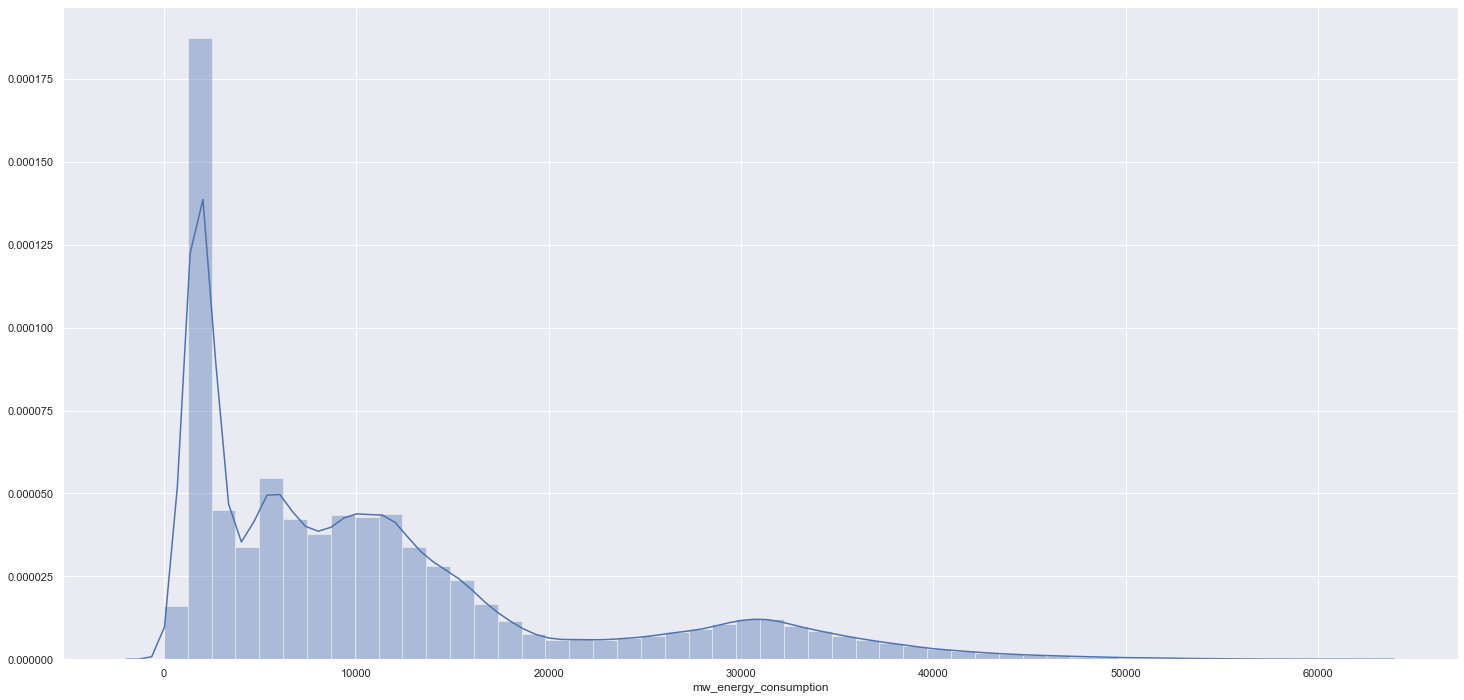

In [143]:
sns.distplot( df1['mw_energy_consumption'] )

### 1.7.2 Cetegorical Attibutes

In [145]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

electric_company    12
dtype: int64

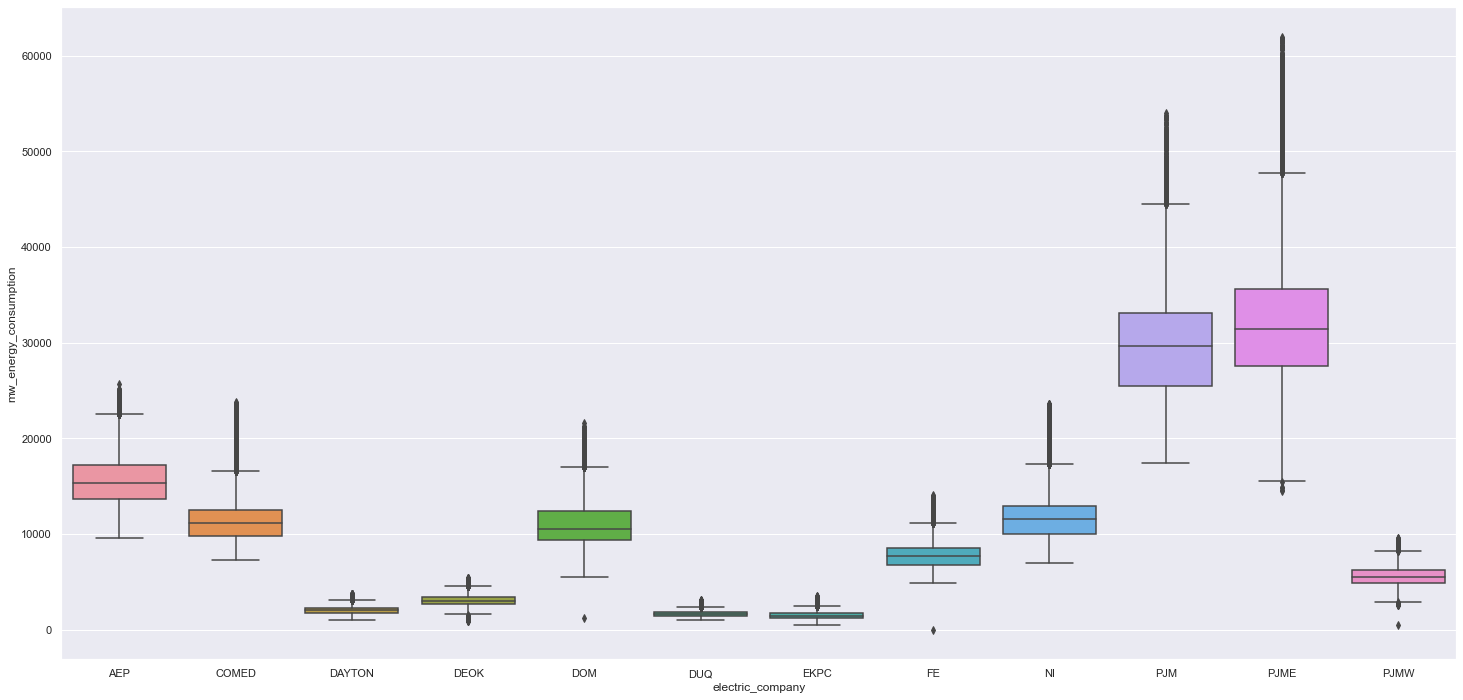

In [146]:
sns.boxplot( x= 'electric_company', y='mw_energy_consumption' , data=df1 )

# 2.0 STEP 02 - FEATURE ENGINEERING

In [147]:
df2 = df1.copy()

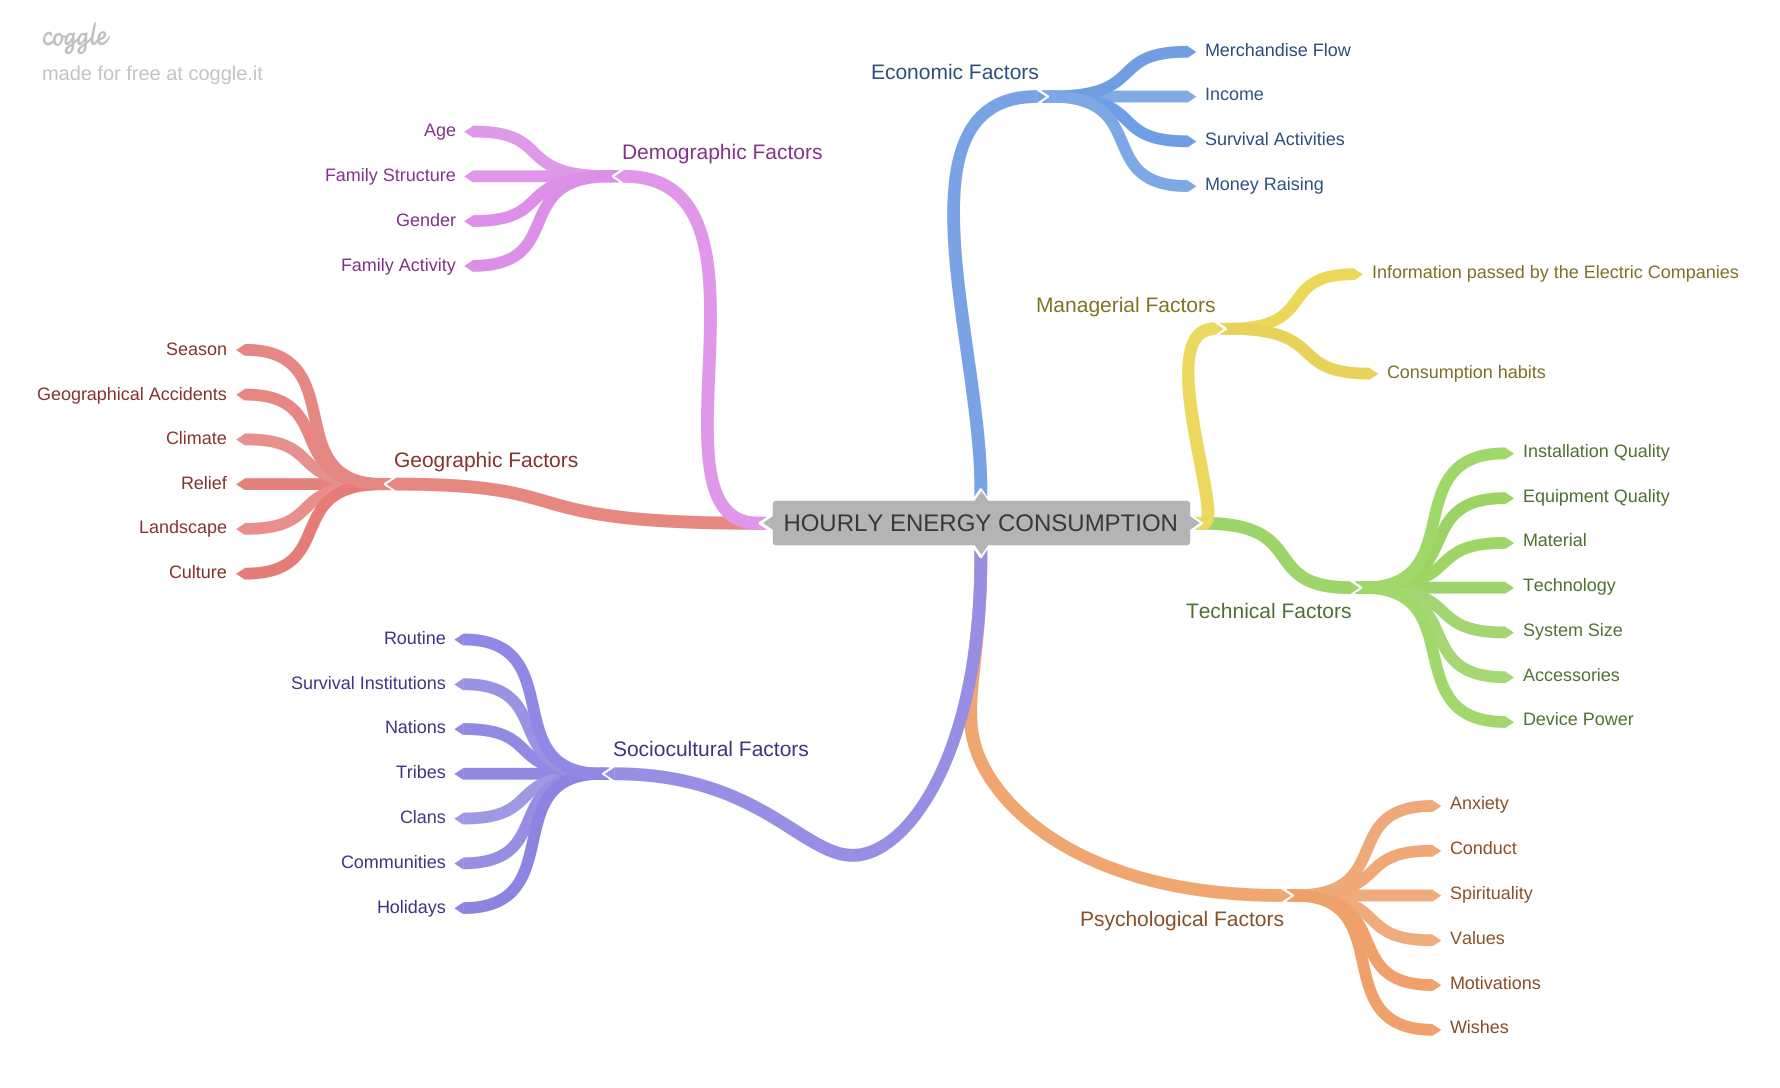

In [150]:
Image( 'image/Hyphoteses_Map.png' )
# As we can see in the Hypothesis Map below, there are many factors that influence the consumption of electricity and that we could use to try to predict them.
# The point is that we only have "datetime" information in the dataset. Because of this we will only use a few elements and their attributes.

## 2.1 Creation of Hypotheses

### 2.1.1 Demographic Hypotheses

**1.** Older people spend less energy

**2.** Larger families spend more energy

**3.** Female people spend more energy

**4.** Family activity influences energy expenditure in the early morning and late afternoon.

### 2.1.2 Geographic Hypotheses

**1.** Seasons with higher temperatures use more energy

**2.** Locations present in geographic accidents spend more energy

**3.** Climate with higher temperatures use more energy

### 2.1.3 Sociocultural Hypotheses

**1.** Routines that start when there is less sunlight use more energy

**2.** Tribes spend less energy

**3.** Nations spend more energy

**4.** Communities spend less energy

**5.** Holiday periods spend more energy

## 2.2 Final List of Hypotheses

**1.** Family activity influences energy expenditure in the early morning and late afternoon

**2.** Seasons with higher temperatures use more energy

**3.** Holiday periods spend more energy

**4.** Weekends periods spend more energy

## 2.3 Feature Engineering

In [167]:
pd.to_datetime(df2['datetime']).dt.month.sample()

80746    6
Name: datetime, dtype: int64

In [164]:
# hour_of_day:

# Initially I thought about converting the hours in the "datetime" column to float, because it would be better to visualize the energy consumption by the evolution of the hours, but observing the part of the hours in the "datetime" column we can see that all of them have only the same hour and not the minute and second. For this reason I will only create the "hour_of_day" column using the "hour" function.

df2['hour_of_day'] = df2['datetime'].dt.hour

# season:

# - Winter -> December (12), January (01) and February (02);
# - Spring -> March (03), April (04) and May (05);
# - Summer -> Jun (06), July (07) and August (08);
# - Autumn -> September (09), October (10) and November (11).

df2['season'] = df2['datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')

# holiday:

# As to create a code that takes the relative weekends within the month it will take a long time to make, for this first cycle within the project I will only determine as "holiday" those that have fixed dates.
# Another rule that I will use is to consider the eve of the dates as a "holiday".

# - New Year's Day ---------------------------- Jan 1
# - Martin Luther King Jr. Day ---------------- 3rd Monday in January
# - Valentine's Day --------------------------- Feb 14
# - Saint Patrick's Day ----------------------- March 17
# - Easter ------------------------------------ Sunday in March or April
# - Mother's Day ------------------------------ 2nd Sunday in May
# - Memorial Day  ----------------------------- Last Monday in May
# - Father's Day ------------------------------ Sunday in June
# - Independence Day -------------------------- Jul 4
# - Labor Day --------------------------------- 1st Monday in September
# - Halloween --------------------------------- Oct 31
# - Veterans Day ------------------------------ Nov 11
# - Thanksgiving ------------------------------ 4th Thurday in November
# - Christmas Day ----------------------------- Dec 25

df2['holiday'] = df2['datetime'].apply( lambda x: 'Holiday' if (x.month == 12 and x.day == 31) or (x.month == 1 and x.day == 1) or (x.month == 2 and x.day == 14) or (x.month == 2 and x.day == 13) or (x.month == 3 and x.day == 17) or (x.month == 3 and x.day == 16) or (x.month == 7 and x.day == 4) or (x.month == 7 and x.day == 3) or (x.month == 10 and x.day == 31) or (x.month == 10 and x.day == 30) or (x.month == 11 and x.day == 11) or (x.month == 11 and x.day == 10) or (x.month == 12 and x.day == 25) or (x.month == 12 and x.day == 24) else x )

# day_of_week:

# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

df2['day_of_week'] = df2['datetime'].dt.weekday



In [169]:
df2['season'] = df2['datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '' )
df2.sample()

,datetime,mw_energy_consumption,electric_company,time,season
115532,2015-10-26 21:00:00,30928.0,PJME,21:00:00,Autumn


In [174]:
df2['season'].value_counts()

Summer    280088
Spring    278077
Winter    267038
Autumn    264964
Name: season, dtype: int64

In [177]:
df2['hour_of_day'] = df2['datetime'].dt.hour+df2['datetime'].dt.minute/60.0

In [178]:
df2['hour_of_day'].sample()

79206    2.0
Name: hour_of_day, dtype: float64

In [183]:
df2['holiday'] = df2['datetime'].apply( lambda x: 'Holiday' if (x.month == 12 and x.day == 31) or (x.month == 1 and x.day == 1) or (x.month == 2 and x.day == 14) or (x.month == 2 and x.day == 13) or (x.month == 3 and x.day == 17) or (x.month == 3 and x.day == 16) or (x.month == 7 and x.day == 4) or (x.month == 7 and x.day == 3) or (x.month == 10 and x.day == 31) or (x.month == 10 and x.day == 30) or (x.month == 11 and x.day == 11) or (x.month == 11 and x.day == 10) or (x.month == 12 and x.day == 25) or (x.month == 12 and x.day == 24) else 'Normal day' )
df2.sample()

,datetime,mw_energy_consumption,electric_company,time,season,hour_of_day,holiday
73490,2010-05-15 21:00:00,4849.0,PJMW,21:00:00,Spring,21.0,Normal day


In [186]:
df2.sample()

,datetime,mw_energy_consumption,electric_company,time,season,hour_of_day,holiday
52505,2007-01-03 06:00:00,31161.0,PJME,06:00:00,Winter,6.0,Normal day


In [187]:
df2['holiday'].value_counts()

Normal day    1048566
Holiday         41601
Name: holiday, dtype: int64